https://discourse.julialang.org/t/function-compiles-every-time/63273

In [1]:
using StaticArrays
using AstrodynamicalModels
using DifferentialEquations

In [2]:
using StaticArrays
using AstrodynamicalModels
using DifferentialEquations

defaults = (; reltol=1e-14, abstol=1e-14, save_everystep=false)
kwargs   = (;)
options  = merge(defaults, kwargs)

r = randn(3) * 1e4
v = randn(3) * 1e3
T = 10_000.0

p1 = ODEProblem(R2BP, MVector{6}(vcat(r,v)), (0.0, T), MVector{1}(398600.435))
T1 = typeof(p1)

p2 = ODEProblem(R2BP, MVector{6}(vcat(r,v)), (0.0, T), MVector{1}(398600.435))
T2 = typeof(p2)

T1 === T2 #> false

false

In [3]:
using StaticArrays
using AstrodynamicalModels
using DifferentialEquations

function propagate(r, v, T; kwargs...)

  defaults = (; reltol=1e-14, abstol=1e-14, save_everystep=false)
  options  = merge(defaults, kwargs)

  problem   = ODEProblem(R2BP, MVector{6}(vcat(r,v)), (0.0, T), MVector{1}(398600.435))
  solutions = solve(problem; options...)

end

r = randn(3) * 1e4
v = randn(3) * 1e3
T = 10_000.0

@time propagate(r,v,T) #  28.067676 seconds (93.98 M allocations: 5.404 GiB, 3.61% gc time)
@time propagate(r,v,T) #   7.187065 seconds (13.05 M allocations: 704.718 MiB, 1.34% gc time, 99.70% compilation time)
@time propagate(r,v,T) #   7.154281 seconds (13.06 M allocations: 705.808 MiB, 1.79% gc time, 99.43% compilation time)

 19.063951 seconds (51.91 M allocations: 2.904 GiB, 4.82% gc time, 0.14% compilation time)
  9.072420 seconds (13.13 M allocations: 714.472 MiB, 3.06% gc time, 0.20% compilation time)
  9.253713 seconds (13.11 M allocations: 713.193 MiB, 1.99% gc time, 0.19% compilation time)


retcode: Success
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
     0.0
 10000.0
u: 2-element Vector{MVector{6, Float64}}:
 [12412.650484147644, 12103.376070162632, -1625.5375866294175, -99.25831368896978, 241.49659859743628, 581.2225997437035]
 [-980358.3395059974, 2.4267108345259666e6, 5.810330510764783e6, -99.27708073412963, 241.46047861105086, 581.1951236441408]

In [4]:
using StaticArrays
using AstrodynamicalModels
using DifferentialEquations

defaults = (; reltol=1e-14, abstol=1e-14, save_everystep=false)
kwargs   = (;)
options  = merge(defaults, kwargs)

r = randn(3) * 1e4
v = randn(3) * 1e3
T = 10_000.0

problem   = ODEProblem(R2BP, MVector{6}(vcat(r,v)), (0.0, T), MVector{1}(398600.435))

@time solutions = solve(problem; options...) #  15.728376 seconds (50.96 M allocations: 2.763 GiB, 4.17% gc time, 2.34% compilation time)
@time solutions = solve(problem; options...) #   0.012221 seconds (540.66 k allocations: 9.171 MiB)
@time solutions = solve(problem; options...) #   0.012453 seconds (540.66 k allocations: 9.171 MiB)

  8.765641 seconds (12.98 M allocations: 709.629 MiB, 1.39% gc time, 0.02% compilation time)
  0.009966 seconds (323.99 k allocations: 5.565 MiB)
  0.010122 seconds (323.99 k allocations: 5.565 MiB)


retcode: Success
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
     0.0
 10000.0
u: 2-element Vector{MVector{6, Float64}}:
 [13794.067642711969, 31622.624012791624, -7376.489878770511, -35.0063963323342, 536.923112251587, -1.8045312393149298]
 [-336306.62850241835, 5.400648039418689e6, -25398.118617526998, -35.01006538817909, 536.9019753314114, -1.8021459821324972]

In [5]:
using StaticArrays
using AstrodynamicalModels
using DifferentialEquations

function propagate_remake(problem_default, r, v, T; kwargs...)

  defaults = (; reltol=1e-14, abstol=1e-14, save_everystep=false)
  options  = merge(defaults, kwargs)

  problem_remaked = remake(problem; 
        u0 = MVector{6}(vcat(r,v)), tspan = (0.0, T), p = MVector{1}(398600.435))
  solutions = solve(problem_remaked; options...)

end

r = randn(3) * 1e4
v = randn(3) * 1e3
T = 10_000.0
problem = ODEProblem(R2BP, MVector{6}(vcat(r,v)), (0.0, T), MVector{1}(398600.435))

r = randn(3) * 1e4
v = randn(3) * 1e3
T = 10_000.0
@time sol1 = propagate_remake(problem, r, v, T)

r = randn(3) * 1e4
v = randn(3) * 1e3
T = 10_000.0
@time sol2 = propagate_remake(problem, r, v, T)

r = randn(3) * 1e4
v = randn(3) * 1e3
T = 10_000.0
@time sol3 = propagate_remake(problem, r, v, T);

# 9.130384 seconds (13.13 M allocations: 715.117 MiB, 1.53% gc time, 0.16% compilation time)
# 0.014155 seconds (452.63 k allocations: 7.765 MiB)
# 0.013558 seconds (448.20 k allocations: 7.689 MiB)

  8.818086 seconds (13.19 M allocations: 716.349 MiB, 1.64% gc time)
  0.014491 seconds (452.63 k allocations: 7.765 MiB)
  0.015373 seconds (483.69 k allocations: 8.296 MiB)


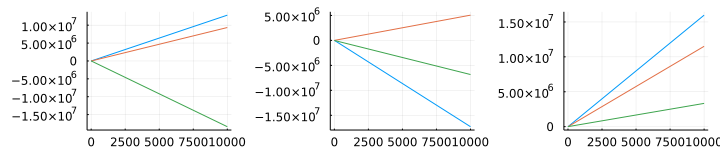

In [6]:
using Plots
PP = []
for sol in (sol1, sol2, sol3)
    t = range(sol.prob.tspan...; length=1000)
    y = hcat((sol.(t; idxs=i) for i in 1:3)...)
    P = plot(t, y; label="")
    push!(PP, P)
end
plot(PP...; size=(720, 150), layout=(1, 3))